# Model notebook

### Import necessary libraries

In [218]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pylab import *

### Import data

In [138]:
df = pd.read_csv('CasesDeathsRecoveredFrance.csv', index_col=0)

In [139]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
cases,France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,...,154188.0,156921.0,154715.0,157026.0,158636.0,160292.0,160847.0,164589.0,167605.0,165093.0
deaths,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20265.0,20796.0,21340.0,21856.0,22245.0,22614.0,22856.0,23293.0,23660.0,24087.0
recovered,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37409.0,39181.0,40657.0,42088.0,43493.0,44594.0,44903.0,45513.0,46886.0,48228.0


In [140]:
df = df.drop(columns=['Country/Region'])

In [141]:
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
cases,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,154188.0,156921.0,154715.0,157026.0,158636.0,160292.0,160847.0,164589.0,167605.0,165093.0
deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20265.0,20796.0,21340.0,21856.0,22245.0,22614.0,22856.0,23293.0,23660.0,24087.0
recovered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37409.0,39181.0,40657.0,42088.0,43493.0,44594.0,44903.0,45513.0,46886.0,48228.0


In [83]:
# Just about infections now
time_index = pd.to_datetime(df.columns)
data = df.iloc[0,:].values

ts = pd.Series(data = data, index = time_index) 

ts = ts.iloc[2:]

ts_num = pd.to_numeric(ts.index)
t0 = ts_num[0]
# Convert datetime to days
t_days = (ts_num-t0)/(10**9*86400)
t_days = t_days.astype(int).values
# t_days is an input for SIR

In [58]:
ts_num = pd.to_numeric(ts.index)
t0 = ts_num[0]
# Convert datetime to days
t_days = (ts_num-t0)/(10**9*86400)
t_days = t_days.astype(int).values
# t_days is an input for SIR

In [248]:
time_index = pd.to_datetime(df.columns)
data = df.iloc[0,:].values

ts = pd.Series(data = data, index = time_index) 

ts = ts.iloc[2:]

# N / 100
#ts = ts/1000

ts_num = pd.to_numeric(ts.index)
t0 = ts_num[0]
# Convert datetime to days
t_days = (ts_num-t0)/(10**9*86400)
t_days = t_days.astype(int).values
# t_days is an input for SIR

In [249]:
t_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

In [250]:
ts.values

array([2.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00, 4.00000e+00,
       5.00000e+00, 5.00000e+00, 5.00000e+00, 6.00000e+00, 6.00000e+00,
       6.00000e+00, 6.00000e+00, 6.00000e+00, 6.00000e+00, 6.00000e+00,
       1.10000e+01, 1.10000e+01, 1.10000e+01, 1.10000e+01, 1.10000e+01,
       1.10000e+01, 1.10000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01,
       1.20000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01,
       1.20000e+01, 1.20000e+01, 1.40000e+01, 1.80000e+01, 3.80000e+01,
       5.70000e+01, 1.00000e+02, 1.30000e+02, 1.91000e+02, 2.04000e+02,
       2.85000e+02, 3.77000e+02, 6.53000e+02, 9.49000e+02, 1.12600e+03,
       1.20900e+03, 1.78400e+03, 2.28100e+03, 2.28100e+03, 3.66100e+03,
       4.46900e+03, 4.49900e+03, 6.63300e+03, 7.65200e+03, 9.04300e+03,
       1.08710e+04, 1.26120e+04, 1.42820e+04, 1.60180e+04, 1.98560e+04,
       2.23040e+04, 2.52330e+04, 2.91550e+04, 3.29640e+04, 3.75750e+04,
       4.01740e+04, 4.45500e+04, 5.21280e+04, 5.69890e+04, 5.910

In [259]:
# [1000, 1000] is way too much
beta,gamma = [0.00000003,1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [252]:
t_days[1:-1]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [253]:
t_days.shape

(97,)

In [254]:
ts.values.shape

(97,)

In [255]:
sol.y

array([[6.50000000e+04, 6.49999982e+04, 6.49999798e+04, 6.49997936e+04,
        6.49976974e+04, 6.49839798e+04, 6.49291627e+04, 6.47023334e+04,
        6.42830531e+04],
       [2.00000000e+00, 2.00042420e+00, 2.00467118e+00, 2.04763976e+00,
        2.53134207e+00, 5.69544102e+00, 1.83174279e+01, 7.01682188e+01,
        1.64388929e+02],
       [0.00000000e+00, 1.41401014e-03, 1.55706173e-02, 1.58800281e-01,
        1.77127619e+00, 1.23247116e+01, 5.45198566e+01, 2.29498347e+02,
        5.54558013e+02]])

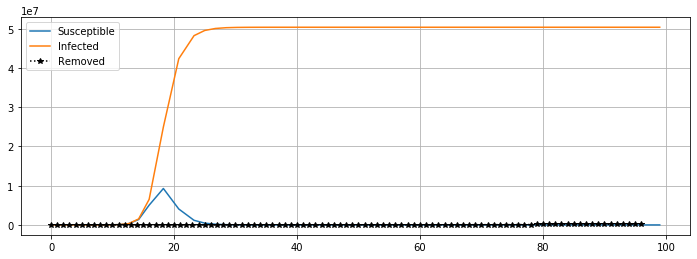

In [262]:
# N / 1000
sol = solve_ivp(SIR,[0,99],[65000000,2,0])


fig = plt.figure(figsize=(12,4))
#plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(t_days,ts.values,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

In [227]:
ts.shape

(97,)

In [228]:
def sumsq(p):
    beta, gamma = p
    
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    sol = solve_ivp(SIR,[0,99],[65000,2,0])
    return(sum((sol.y[1][::5] - ts)**2))

msol = minimize(sumsq,[0.000003,0.01],method='Nelder-Mead')

msol.x

ValueError: operands could not be broadcast together with shapes (4,) (97,) 

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

data = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]

In [42]:
beta,gamma = [0.01,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

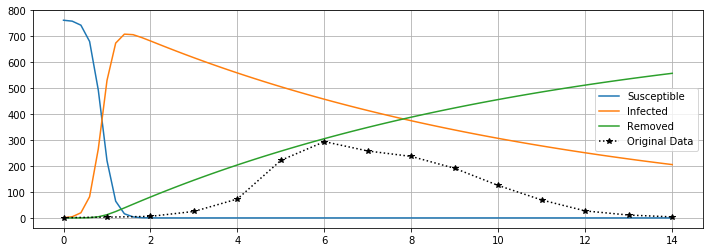

In [43]:
sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0,15),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

In [ ]:
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])


def sumsq(p):
    beta, gamma = p
    sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))
    return(sum((sol.y[1][::5]-data)**2))

msol = minimize(sumsq,[0.001,1],method='Nelder-Mead')
msol.x

In [275]:
temp = pd.read_json('https://api.covid19api.com/all')

In [276]:
temp

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
351495,Zimbabwe,ZW,,,,-19.02,29.15,31,4,2,0,2020-04-26 00:00:00+00:00
351496,Zimbabwe,ZW,,,,-19.02,29.15,32,4,5,0,2020-04-27 00:00:00+00:00
351497,Zimbabwe,ZW,,,,-19.02,29.15,32,4,5,0,2020-04-28 00:00:00+00:00
351498,Zimbabwe,ZW,,,,-19.02,29.15,32,4,5,0,2020-04-29 00:00:00+00:00


In [281]:
temp = temp.loc[temp['Country'] == 'France' & temp['Province'] == '']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
11300,France,FR,Guadeloupe,,,16.25,-61.58,0,0,0,0,2020-01-22 00:00:00+00:00
11301,France,FR,Martinique,,,14.64,-61.02,0,0,0,0,2020-01-22 00:00:00+00:00
11302,France,FR,New Caledonia,,,-20.90,165.62,0,0,0,0,2020-01-22 00:00:00+00:00
11303,France,FR,St Martin,,,18.07,-63.05,0,0,0,0,2020-01-22 00:00:00+00:00
11304,France,FR,Reunion,,,-21.14,55.25,0,0,0,0,2020-01-22 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
12395,France,FR,French Guiana,,,3.93,-53.13,126,1,94,0,2020-04-30 00:00:00+00:00
12396,France,FR,Reunion,,,-21.14,55.25,420,0,300,0,2020-04-30 00:00:00+00:00
12397,France,FR,Mayotte,,,-12.83,45.17,539,4,235,0,2020-04-30 00:00:00+00:00
12398,France,FR,French Polynesia,,,-17.68,149.41,58,0,50,0,2020-04-30 00:00:00+00:00


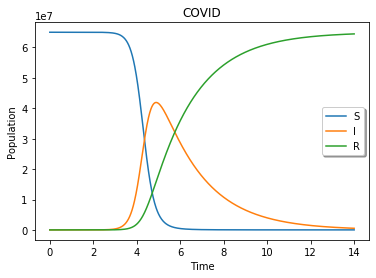

In [12]:
N = 65000000      # Initial population
I = 2         # Initially infected people
R = 0         # 0 Recovered
S = N - I - R     # Susceptible (N=S+I+R)

beta = 4.5         # Rate of infection
gamma = .5           # Rate of recovery
    

T = 14       # Time-play

def SIR(vals,t,b,g):
    S,I,R = vals
    
    dS = -b*S*I/N     # dS/dt
    dI = b*S*I/N - g*I
    dR = g*I
    
    return [dS,dI,dR]

    
t=np.linspace(0,T,1000)
x=[S,I,R]           # Initial params
rates=(beta,gamma)
sol=odeint(SIR,x,t,args=rates)

# Plot ODE solutions
plt.plot(t,sol[:,0])
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,2])

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['S','I','R'],shadow=True)
plt.title('COVID')
plt.draw()

In [11]:
sol

array([[6.49995000e+07, 5.00000000e+02, 0.00000000e+00],
       [6.49994676e+07, 5.28828220e+02, 3.60355975e+00],
       [6.49994333e+07, 5.59318555e+02, 7.41488785e+00],
       ...,
       [8.34085156e+03, 2.73546356e+05, 6.47181128e+07],
       [8.33864596e+03, 2.71638512e+05, 6.47200228e+07],
       [8.33645632e+03, 2.69743974e+05, 6.47219196e+07]])